<Figure size 1080x720 with 0 Axes>

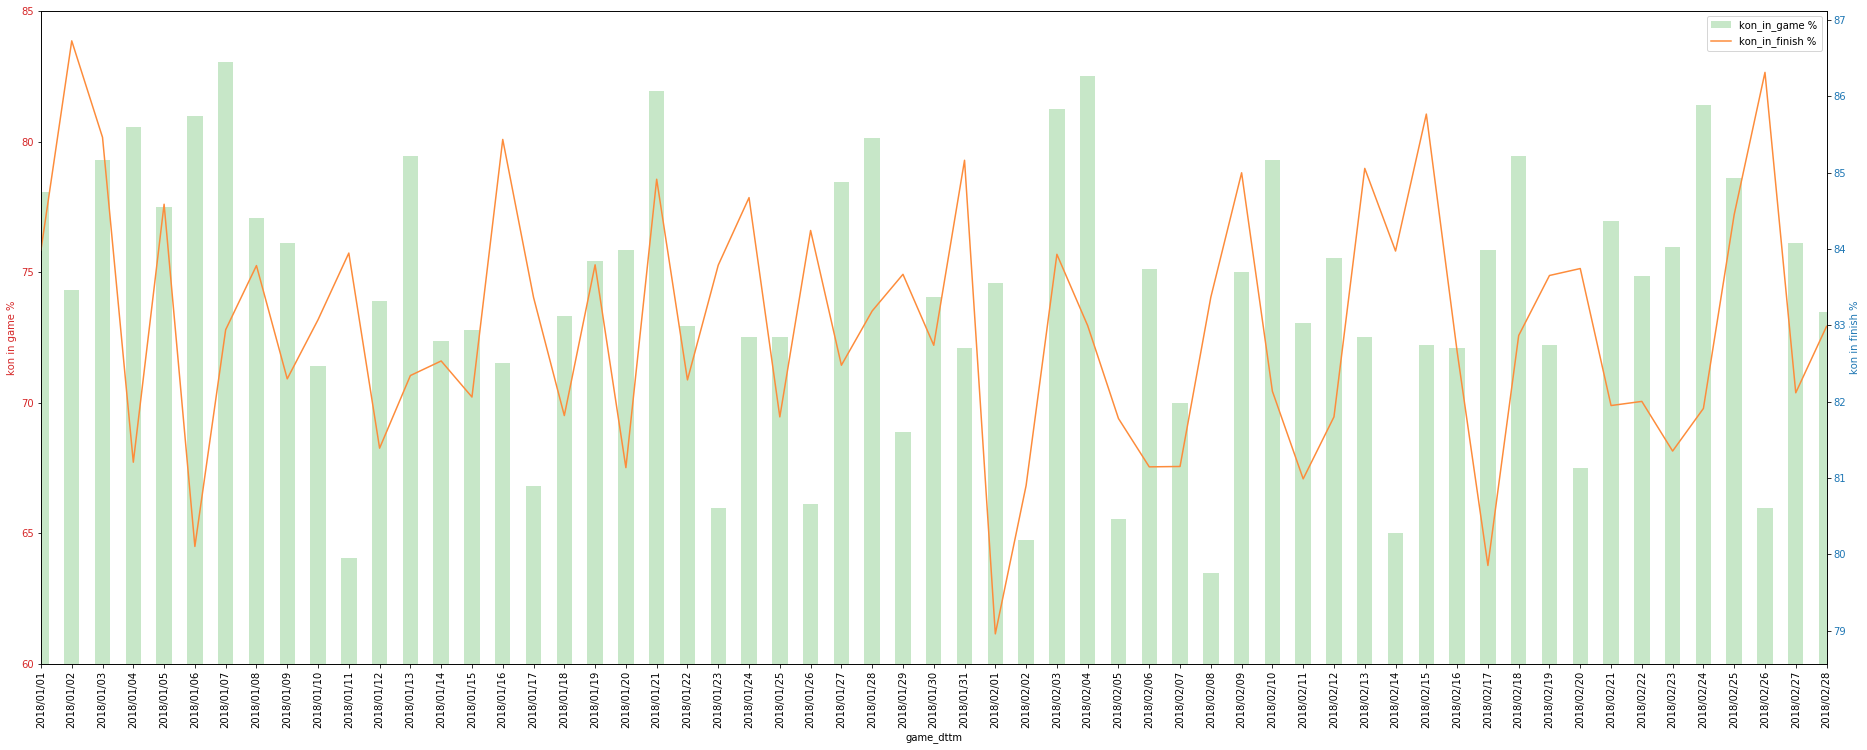

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

orange = plt.cm.Oranges(0.5)
green = plt.cm.Greens(0.5)

plt.figure(figsize=(15,10))
df = pd.read_csv('Game.csv',sep=';', na_values='NaN')
del df['game_rk'],df['quest_rk'],df['employee_rk'],df['price'],df['time']

df['game_dttm'] = pd.to_datetime(df['game_dttm']) #преобразовали тип
df['game_dttm'] = df['game_dttm'].dt.strftime('%Y/%m/%d')

df['finish_happened']=df['finish_flg']
dfp = pd.pivot_table(df,index='game_dttm', aggfunc={'game_flg':'count', 'finish_flg':'count','finish_happened':'sum'})
dfp['kon_in_game %'] = dfp['finish_flg']*100/dfp['game_flg']
dfp['kon_in_finish %'] = dfp['finish_happened']*100/dfp['finish_flg']
dfp = dfp.reindex(['game_flg','finish_flg','finish_happened','kon_in_game %','kon_in_finish %'], axis=1)



fig, ax1 = plt.subplots(figsize=(32, 12))

color = 'tab:red'
ax1.set_xlabel('game_dttm')
ax1.set_ylabel('kon in game %', color=color)
dfp['kon_in_game %'].plot(kind='bar',figsize=(32, 12),alpha = 0.4, ax=ax1, color=[green], legend=False).set_ylim(60,85,5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('kon in finish %', color=color) 
dfp['kon_in_finish %'].plot(color=[orange], ax=ax2, legend=False)
ax2.tick_params(axis='y', labelcolor=color)


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2);



